In [1]:
from deep_rl import *
import matplotlib.pyplot as plt

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [4]:
# game = 'CartPole-v0'
game = 'FourRooms'
dqn_feature(game=game)

2020-02-28 01:24:12,912 - root - INFO: steps 0, 220752842.11 steps/s
2020-02-28 01:24:13,307 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-02-28 01:24:13,445 - root - INFO: steps 199, episodic_return_train -200
2020-02-28 01:24:13,500 - root - INFO: steps 399, episodic_return_train -200
2020-02-28 01:24:13,502 - root - INFO: steps 400, episodic_return_train 0
2020-02-28 01:24:13,557 - root - INFO: steps 600, episodic_return_train -200
2020-02-28 01:24:13,612 - root - INFO: steps 800, episodic_return_train -200
2020-02-28 01:24:13,663 - root - INFO: steps 1000, 1334.02 steps/s
2020-02-28 01:24:13,665 - root - INFO: steps 1000, episodic_return_train -200
2020-02-28 01:24:13,720 - root - INFO: steps 1063, episodic_return_train -62
2020-02-28 01:24:13,784 - root - INFO: steps 1154, episodic_return_train -90
2020-02-28 01:24:13,815 - root - INFO: steps 1199, episodic_return_train -44
2020-02-28 01:24:13,955 - root - INFO: steps 1399, episodic_return_train -200
2020-02-28 0

2020-02-28 01:24:21,697 - root - INFO: steps 10906, episodic_return_train -10
2020-02-28 01:24:21,704 - root - INFO: steps 10912, episodic_return_train -5
2020-02-28 01:24:21,765 - root - INFO: steps 11000, 933.05 steps/s
2020-02-28 01:24:21,845 - root - INFO: steps 11112, episodic_return_train -200
2020-02-28 01:24:21,984 - root - INFO: steps 11312, episodic_return_train -200
2020-02-28 01:24:22,082 - root - INFO: steps 11450, episodic_return_train -137
2020-02-28 01:24:22,227 - root - INFO: steps 11650, episodic_return_train -200
2020-02-28 01:24:22,232 - root - INFO: steps 11653, episodic_return_train -2
2020-02-28 01:24:22,240 - root - INFO: steps 11656, episodic_return_train -2
2020-02-28 01:24:22,381 - root - INFO: steps 11856, episodic_return_train -200
2020-02-28 01:24:22,479 - root - INFO: steps 12000, 1402.06 steps/s
2020-02-28 01:24:22,513 - root - INFO: steps 12045, episodic_return_train -188
2020-02-28 01:24:22,592 - root - INFO: steps 12157, episodic_return_train -111
202

2020-02-28 01:24:27,138 - root - INFO: steps 18427, episodic_return_train -3
2020-02-28 01:24:27,142 - root - INFO: steps 18431, episodic_return_train -3
2020-02-28 01:24:27,146 - root - INFO: steps 18432, episodic_return_train 0
2020-02-28 01:24:27,153 - root - INFO: steps 18442, episodic_return_train -9
2020-02-28 01:24:27,162 - root - INFO: steps 18451, episodic_return_train -8
2020-02-28 01:24:27,171 - root - INFO: steps 18459, episodic_return_train -7
2020-02-28 01:24:27,223 - root - INFO: steps 18529, episodic_return_train -69
2020-02-28 01:24:27,230 - root - INFO: steps 18533, episodic_return_train -3
2020-02-28 01:24:27,238 - root - INFO: steps 18542, episodic_return_train -8
2020-02-28 01:24:27,266 - root - INFO: steps 18581, episodic_return_train -38
2020-02-28 01:24:27,287 - root - INFO: steps 18609, episodic_return_train -27
2020-02-28 01:24:27,296 - root - INFO: steps 18623, episodic_return_train -13
2020-02-28 01:24:27,309 - root - INFO: steps 18639, episodic_return_train

2020-02-28 01:24:28,979 - root - INFO: steps 20566, episodic_return_train -13
2020-02-28 01:24:28,991 - root - INFO: steps 20580, episodic_return_train -13
2020-02-28 01:24:28,997 - root - INFO: steps 20588, episodic_return_train -7
2020-02-28 01:24:29,005 - root - INFO: steps 20602, episodic_return_train -13
2020-02-28 01:24:29,021 - root - INFO: steps 20618, episodic_return_train -15
2020-02-28 01:24:29,025 - root - INFO: steps 20620, episodic_return_train -1
2020-02-28 01:24:29,029 - root - INFO: steps 20626, episodic_return_train -5
2020-02-28 01:24:29,099 - root - INFO: steps 20733, episodic_return_train -106
2020-02-28 01:24:29,110 - root - INFO: steps 20748, episodic_return_train -14
2020-02-28 01:24:29,116 - root - INFO: steps 20757, episodic_return_train -8
2020-02-28 01:24:29,131 - root - INFO: steps 20779, episodic_return_train -21
2020-02-28 01:24:29,142 - root - INFO: steps 20795, episodic_return_train -15
2020-02-28 01:24:29,161 - root - INFO: steps 20819, episodic_return

2020-02-28 01:24:30,424 - root - INFO: steps 22313, episodic_return_train -20
2020-02-28 01:24:30,432 - root - INFO: steps 22320, episodic_return_train -6
2020-02-28 01:24:30,440 - root - INFO: steps 22330, episodic_return_train -9
2020-02-28 01:24:30,465 - root - INFO: steps 22361, episodic_return_train -30
2020-02-28 01:24:30,473 - root - INFO: steps 22371, episodic_return_train -9
2020-02-28 01:24:30,484 - root - INFO: steps 22382, episodic_return_train -10
2020-02-28 01:24:30,495 - root - INFO: steps 22395, episodic_return_train -12
2020-02-28 01:24:30,507 - root - INFO: steps 22404, episodic_return_train -8
2020-02-28 01:24:30,546 - root - INFO: steps 22459, episodic_return_train -54
2020-02-28 01:24:30,551 - root - INFO: steps 22463, episodic_return_train -3
2020-02-28 01:24:30,571 - root - INFO: steps 22484, episodic_return_train -20
2020-02-28 01:24:30,586 - root - INFO: steps 22506, episodic_return_train -21
2020-02-28 01:24:30,602 - root - INFO: steps 22525, episodic_return_t

2020-02-28 01:24:31,916 - root - INFO: steps 24050, episodic_return_train -30
2020-02-28 01:24:31,923 - root - INFO: steps 24059, episodic_return_train -8
2020-02-28 01:24:31,937 - root - INFO: steps 24076, episodic_return_train -16
2020-02-28 01:24:31,947 - root - INFO: steps 24090, episodic_return_train -13
2020-02-28 01:24:31,951 - root - INFO: steps 24094, episodic_return_train -3
2020-02-28 01:24:31,961 - root - INFO: steps 24106, episodic_return_train -11
2020-02-28 01:24:31,981 - root - INFO: steps 24121, episodic_return_train -14
2020-02-28 01:24:31,994 - root - INFO: steps 24136, episodic_return_train -14
2020-02-28 01:24:32,005 - root - INFO: steps 24149, episodic_return_train -12
2020-02-28 01:24:32,012 - root - INFO: steps 24158, episodic_return_train -8
2020-02-28 01:24:32,019 - root - INFO: steps 24166, episodic_return_train -7
2020-02-28 01:24:32,040 - root - INFO: steps 24194, episodic_return_train -27
2020-02-28 01:24:32,045 - root - INFO: steps 24199, episodic_return_

2020-02-28 01:24:33,293 - root - INFO: steps 25576, episodic_return_train -8
2020-02-28 01:24:33,307 - root - INFO: steps 25592, episodic_return_train -15
2020-02-28 01:24:33,321 - root - INFO: steps 25610, episodic_return_train -17
2020-02-28 01:24:33,326 - root - INFO: steps 25612, episodic_return_train -1
2020-02-28 01:24:33,327 - root - INFO: steps 25615, episodic_return_train -2
2020-02-28 01:24:33,335 - root - INFO: steps 25621, episodic_return_train -5
2020-02-28 01:24:33,345 - root - INFO: steps 25634, episodic_return_train -12
2020-02-28 01:24:33,360 - root - INFO: steps 25652, episodic_return_train -17
2020-02-28 01:24:33,376 - root - INFO: steps 25673, episodic_return_train -20
2020-02-28 01:24:33,389 - root - INFO: steps 25689, episodic_return_train -15
2020-02-28 01:24:33,394 - root - INFO: steps 25694, episodic_return_train -4
2020-02-28 01:24:33,434 - root - INFO: steps 25744, episodic_return_train -49
2020-02-28 01:24:33,445 - root - INFO: steps 25759, episodic_return_t

2020-02-28 01:24:34,618 - root - INFO: steps 27132, episodic_return_train -18
2020-02-28 01:24:34,627 - root - INFO: steps 27146, episodic_return_train -13
2020-02-28 01:24:34,650 - root - INFO: steps 27178, episodic_return_train -31
2020-02-28 01:24:34,656 - root - INFO: steps 27186, episodic_return_train -7
2020-02-28 01:24:34,662 - root - INFO: steps 27195, episodic_return_train -8
2020-02-28 01:24:34,679 - root - INFO: steps 27217, episodic_return_train -21
2020-02-28 01:24:34,680 - root - INFO: steps 27218, episodic_return_train 0
2020-02-28 01:24:34,699 - root - INFO: steps 27241, episodic_return_train -22
2020-02-28 01:24:34,714 - root - INFO: steps 27262, episodic_return_train -20
2020-02-28 01:24:34,720 - root - INFO: steps 27268, episodic_return_train -5
2020-02-28 01:24:34,730 - root - INFO: steps 27283, episodic_return_train -14
2020-02-28 01:24:34,742 - root - INFO: steps 27296, episodic_return_train -12
2020-02-28 01:24:34,749 - root - INFO: steps 27305, episodic_return_t

2020-02-28 01:24:35,873 - root - INFO: steps 28662, episodic_return_train -37
2020-02-28 01:24:35,880 - root - INFO: steps 28670, episodic_return_train -7
2020-02-28 01:24:35,890 - root - INFO: steps 28680, episodic_return_train -9
2020-02-28 01:24:35,894 - root - INFO: steps 28685, episodic_return_train -4
2020-02-28 01:24:35,917 - root - INFO: steps 28713, episodic_return_train -27
2020-02-28 01:24:35,985 - root - INFO: steps 28802, episodic_return_train -88
2020-02-28 01:24:36,035 - root - INFO: steps 28866, episodic_return_train -63
2020-02-28 01:24:36,048 - root - INFO: steps 28883, episodic_return_train -16
2020-02-28 01:24:36,055 - root - INFO: steps 28890, episodic_return_train -6
2020-02-28 01:24:36,083 - root - INFO: steps 28926, episodic_return_train -35
2020-02-28 01:24:36,093 - root - INFO: steps 28937, episodic_return_train -10
2020-02-28 01:24:36,115 - root - INFO: steps 28964, episodic_return_train -26
2020-02-28 01:24:36,125 - root - INFO: steps 28976, episodic_return_

2020-02-28 01:24:37,509 - root - INFO: steps 30422, episodic_return_train -3
2020-02-28 01:24:37,534 - root - INFO: steps 30452, episodic_return_train -29
2020-02-28 01:24:37,535 - root - INFO: steps 30455, episodic_return_train -2
2020-02-28 01:24:37,555 - root - INFO: steps 30476, episodic_return_train -20
2020-02-28 01:24:37,559 - root - INFO: steps 30480, episodic_return_train -3
2020-02-28 01:24:37,567 - root - INFO: steps 30490, episodic_return_train -9
2020-02-28 01:24:37,580 - root - INFO: steps 30505, episodic_return_train -14
2020-02-28 01:24:37,597 - root - INFO: steps 30526, episodic_return_train -20
2020-02-28 01:24:37,604 - root - INFO: steps 30535, episodic_return_train -8
2020-02-28 01:24:37,631 - root - INFO: steps 30566, episodic_return_train -30
2020-02-28 01:24:37,638 - root - INFO: steps 30574, episodic_return_train -7
2020-02-28 01:24:37,655 - root - INFO: steps 30594, episodic_return_train -19
2020-02-28 01:24:37,670 - root - INFO: steps 30609, episodic_return_tr

2020-02-28 01:24:38,838 - root - INFO: steps 31970, episodic_return_train -11
2020-02-28 01:24:38,846 - root - INFO: steps 31979, episodic_return_train -8
2020-02-28 01:24:38,853 - root - INFO: steps 31984, episodic_return_train -4
2020-02-28 01:24:38,863 - root - INFO: steps 31997, episodic_return_train -12
2020-02-28 01:24:38,866 - root - INFO: steps 32000, 1198.59 steps/s
2020-02-28 01:24:38,870 - root - INFO: steps 32004, episodic_return_train -6
2020-02-28 01:24:38,889 - root - INFO: steps 32031, episodic_return_train -26
2020-02-28 01:24:38,907 - root - INFO: steps 32053, episodic_return_train -21
2020-02-28 01:24:38,915 - root - INFO: steps 32062, episodic_return_train -8
2020-02-28 01:24:38,922 - root - INFO: steps 32071, episodic_return_train -8
2020-02-28 01:24:38,938 - root - INFO: steps 32090, episodic_return_train -18
2020-02-28 01:24:38,959 - root - INFO: steps 32111, episodic_return_train -20
2020-02-28 01:24:38,979 - root - INFO: steps 32127, episodic_return_train -15
2

2020-02-28 01:24:40,203 - root - INFO: steps 33527, episodic_return_train -2
2020-02-28 01:24:40,222 - root - INFO: steps 33549, episodic_return_train -21
2020-02-28 01:24:40,236 - root - INFO: steps 33567, episodic_return_train -17
2020-02-28 01:24:40,267 - root - INFO: steps 33604, episodic_return_train -36
2020-02-28 01:24:40,268 - root - INFO: steps 33605, episodic_return_train 0
2020-02-28 01:24:40,301 - root - INFO: steps 33647, episodic_return_train -41
2020-02-28 01:24:40,328 - root - INFO: steps 33677, episodic_return_train -29
2020-02-28 01:24:40,335 - root - INFO: steps 33685, episodic_return_train -7
2020-02-28 01:24:40,343 - root - INFO: steps 33695, episodic_return_train -9
2020-02-28 01:24:40,357 - root - INFO: steps 33710, episodic_return_train -14
2020-02-28 01:24:40,376 - root - INFO: steps 33733, episodic_return_train -22
2020-02-28 01:24:40,393 - root - INFO: steps 33752, episodic_return_train -18
2020-02-28 01:24:40,406 - root - INFO: steps 33768, episodic_return_t

2020-02-28 01:24:41,589 - root - INFO: steps 35064, episodic_return_train -35
2020-02-28 01:24:41,597 - root - INFO: steps 35074, episodic_return_train -9
2020-02-28 01:24:41,611 - root - INFO: steps 35089, episodic_return_train -14
2020-02-28 01:24:41,625 - root - INFO: steps 35104, episodic_return_train -14
2020-02-28 01:24:41,655 - root - INFO: steps 35141, episodic_return_train -36
2020-02-28 01:24:41,675 - root - INFO: steps 35167, episodic_return_train -25
2020-02-28 01:24:41,692 - root - INFO: steps 35186, episodic_return_train -18
2020-02-28 01:24:41,703 - root - INFO: steps 35196, episodic_return_train -9
2020-02-28 01:24:41,729 - root - INFO: steps 35228, episodic_return_train -31
2020-02-28 01:24:41,730 - root - INFO: steps 35231, episodic_return_train -2
2020-02-28 01:24:41,750 - root - INFO: steps 35255, episodic_return_train -23
2020-02-28 01:24:41,755 - root - INFO: steps 35259, episodic_return_train -3
2020-02-28 01:24:41,766 - root - INFO: steps 35271, episodic_return_

2020-02-28 01:24:43,044 - root - INFO: steps 36697, episodic_return_train -15
2020-02-28 01:24:43,058 - root - INFO: steps 36713, episodic_return_train -15
2020-02-28 01:24:43,084 - root - INFO: steps 36746, episodic_return_train -32
2020-02-28 01:24:43,104 - root - INFO: steps 36768, episodic_return_train -21
2020-02-28 01:24:43,121 - root - INFO: steps 36788, episodic_return_train -19
2020-02-28 01:24:43,126 - root - INFO: steps 36794, episodic_return_train -5
2020-02-28 01:24:43,140 - root - INFO: steps 36810, episodic_return_train -15
2020-02-28 01:24:43,155 - root - INFO: steps 36826, episodic_return_train -15
2020-02-28 01:24:43,166 - root - INFO: steps 36834, episodic_return_train -7
2020-02-28 01:24:43,184 - root - INFO: steps 36857, episodic_return_train -22
2020-02-28 01:24:43,202 - root - INFO: steps 36881, episodic_return_train -23
2020-02-28 01:24:43,240 - root - INFO: steps 36930, episodic_return_train -48
2020-02-28 01:24:43,260 - root - INFO: steps 36954, episodic_retur

2020-02-28 01:24:44,411 - root - INFO: steps 38218, episodic_return_train -18
2020-02-28 01:24:44,422 - root - INFO: steps 38230, episodic_return_train -11
2020-02-28 01:24:44,430 - root - INFO: steps 38236, episodic_return_train -5
2020-02-28 01:24:44,442 - root - INFO: steps 38251, episodic_return_train -14
2020-02-28 01:24:44,456 - root - INFO: steps 38266, episodic_return_train -14
2020-02-28 01:24:44,482 - root - INFO: steps 38297, episodic_return_train -30
2020-02-28 01:24:44,487 - root - INFO: steps 38302, episodic_return_train -4
2020-02-28 01:24:44,517 - root - INFO: steps 38336, episodic_return_train -33
2020-02-28 01:24:44,528 - root - INFO: steps 38351, episodic_return_train -14
2020-02-28 01:24:44,554 - root - INFO: steps 38382, episodic_return_train -30
2020-02-28 01:24:44,565 - root - INFO: steps 38394, episodic_return_train -11
2020-02-28 01:24:44,583 - root - INFO: steps 38412, episodic_return_train -17
2020-02-28 01:24:44,597 - root - INFO: steps 38430, episodic_retur

2020-02-28 01:24:45,830 - root - INFO: steps 39839, episodic_return_train -7
2020-02-28 01:24:45,850 - root - INFO: steps 39862, episodic_return_train -22
2020-02-28 01:24:45,877 - root - INFO: steps 39894, episodic_return_train -31
2020-02-28 01:24:45,881 - root - INFO: steps 39898, episodic_return_train -3
2020-02-28 01:24:45,897 - root - INFO: steps 39916, episodic_return_train -17
2020-02-28 01:24:45,913 - root - INFO: steps 39936, episodic_return_train -19
2020-02-28 01:24:45,921 - root - INFO: steps 39946, episodic_return_train -9
2020-02-28 01:24:45,928 - root - INFO: steps 39953, episodic_return_train -6
2020-02-28 01:24:45,951 - root - INFO: steps 39981, episodic_return_train -27
2020-02-28 01:24:45,965 - root - INFO: steps 39993, episodic_return_train -11
2020-02-28 01:24:45,970 - root - INFO: steps 39997, episodic_return_train -3
2020-02-28 01:24:45,974 - root - INFO: steps 40000, 1133.74 steps/s
2020-02-28 01:24:46,016 - root - INFO: steps 40000, episodic_return_test -15.20

2020-02-28 01:24:47,112 - root - INFO: steps 41260, episodic_return_train -14
2020-02-28 01:24:47,150 - root - INFO: steps 41308, episodic_return_train -47
2020-02-28 01:24:47,165 - root - INFO: steps 41327, episodic_return_train -18
2020-02-28 01:24:47,186 - root - INFO: steps 41348, episodic_return_train -20
2020-02-28 01:24:47,187 - root - INFO: steps 41351, episodic_return_train -2
2020-02-28 01:24:47,206 - root - INFO: steps 41372, episodic_return_train -20
2020-02-28 01:24:47,209 - root - INFO: steps 41377, episodic_return_train -4
2020-02-28 01:24:47,229 - root - INFO: steps 41400, episodic_return_train -22
2020-02-28 01:24:47,250 - root - INFO: steps 41417, episodic_return_train -16
2020-02-28 01:24:47,267 - root - INFO: steps 41438, episodic_return_train -20
2020-02-28 01:24:47,284 - root - INFO: steps 41457, episodic_return_train -18
2020-02-28 01:24:47,288 - root - INFO: steps 41461, episodic_return_train -3
2020-02-28 01:24:47,295 - root - INFO: steps 41471, episodic_return

2020-02-28 01:24:48,397 - root - INFO: steps 42820, episodic_return_train -9
2020-02-28 01:24:48,412 - root - INFO: steps 42841, episodic_return_train -20
2020-02-28 01:24:48,416 - root - INFO: steps 42847, episodic_return_train -5
2020-02-28 01:24:48,426 - root - INFO: steps 42856, episodic_return_train -8
2020-02-28 01:24:48,443 - root - INFO: steps 42882, episodic_return_train -25
2020-02-28 01:24:48,456 - root - INFO: steps 42899, episodic_return_train -16
2020-02-28 01:24:48,470 - root - INFO: steps 42917, episodic_return_train -17
2020-02-28 01:24:48,483 - root - INFO: steps 42935, episodic_return_train -17
2020-02-28 01:24:48,495 - root - INFO: steps 42948, episodic_return_train -12
2020-02-28 01:24:48,502 - root - INFO: steps 42957, episodic_return_train -8
2020-02-28 01:24:48,508 - root - INFO: steps 42967, episodic_return_train -9
2020-02-28 01:24:48,523 - root - INFO: steps 42987, episodic_return_train -19
2020-02-28 01:24:48,527 - root - INFO: steps 42991, episodic_return_t

2020-02-28 01:24:49,649 - root - INFO: steps 44282, episodic_return_train -6
2020-02-28 01:24:49,666 - root - INFO: steps 44302, episodic_return_train -19
2020-02-28 01:24:49,673 - root - INFO: steps 44309, episodic_return_train -6
2020-02-28 01:24:49,681 - root - INFO: steps 44317, episodic_return_train -7
2020-02-28 01:24:49,689 - root - INFO: steps 44324, episodic_return_train -6
2020-02-28 01:24:49,713 - root - INFO: steps 44352, episodic_return_train -27
2020-02-28 01:24:49,724 - root - INFO: steps 44367, episodic_return_train -14
2020-02-28 01:24:49,736 - root - INFO: steps 44377, episodic_return_train -9
2020-02-28 01:24:49,762 - root - INFO: steps 44408, episodic_return_train -30
2020-02-28 01:24:49,797 - root - INFO: steps 44454, episodic_return_train -45
2020-02-28 01:24:49,819 - root - INFO: steps 44474, episodic_return_train -19
2020-02-28 01:24:49,830 - root - INFO: steps 44486, episodic_return_train -11
2020-02-28 01:24:49,837 - root - INFO: steps 44493, episodic_return_t

2020-02-28 01:24:51,052 - root - INFO: steps 45845, episodic_return_train -3
2020-02-28 01:24:51,060 - root - INFO: steps 45852, episodic_return_train -6
2020-02-28 01:24:51,080 - root - INFO: steps 45876, episodic_return_train -23
2020-02-28 01:24:51,094 - root - INFO: steps 45885, episodic_return_train -8
2020-02-28 01:24:51,101 - root - INFO: steps 45892, episodic_return_train -6
2020-02-28 01:24:51,112 - root - INFO: steps 45907, episodic_return_train -14
2020-02-28 01:24:51,126 - root - INFO: steps 45921, episodic_return_train -13
2020-02-28 01:24:51,141 - root - INFO: steps 45939, episodic_return_train -17
2020-02-28 01:24:51,156 - root - INFO: steps 45955, episodic_return_train -15
2020-02-28 01:24:51,181 - root - INFO: steps 45981, episodic_return_train -25
2020-02-28 01:24:51,195 - root - INFO: steps 46000, 1057.91 steps/s
2020-02-28 01:24:51,203 - root - INFO: steps 46010, episodic_return_train -28
2020-02-28 01:24:51,211 - root - INFO: steps 46019, episodic_return_train -8
2

2020-02-28 01:24:52,339 - root - INFO: steps 47345, episodic_return_train -14
2020-02-28 01:24:52,358 - root - INFO: steps 47371, episodic_return_train -25
2020-02-28 01:24:52,381 - root - INFO: steps 47397, episodic_return_train -25
2020-02-28 01:24:52,398 - root - INFO: steps 47417, episodic_return_train -19
2020-02-28 01:24:52,415 - root - INFO: steps 47439, episodic_return_train -21
2020-02-28 01:24:52,419 - root - INFO: steps 47443, episodic_return_train -3
2020-02-28 01:24:52,430 - root - INFO: steps 47453, episodic_return_train -9
2020-02-28 01:24:52,434 - root - INFO: steps 47457, episodic_return_train -3
2020-02-28 01:24:52,438 - root - INFO: steps 47463, episodic_return_train -5
2020-02-28 01:24:52,445 - root - INFO: steps 47470, episodic_return_train -6
2020-02-28 01:24:52,452 - root - INFO: steps 47478, episodic_return_train -7
2020-02-28 01:24:52,459 - root - INFO: steps 47485, episodic_return_train -6
2020-02-28 01:24:52,484 - root - INFO: steps 47517, episodic_return_tra

2020-02-28 01:24:53,677 - root - INFO: steps 48850, episodic_return_train -3
2020-02-28 01:24:53,689 - root - INFO: steps 48864, episodic_return_train -13
2020-02-28 01:24:53,695 - root - INFO: steps 48872, episodic_return_train -7
2020-02-28 01:24:53,709 - root - INFO: steps 48890, episodic_return_train -17
2020-02-28 01:24:53,720 - root - INFO: steps 48900, episodic_return_train -9
2020-02-28 01:24:53,744 - root - INFO: steps 48931, episodic_return_train -30
2020-02-28 01:24:53,767 - root - INFO: steps 48958, episodic_return_train -26
2020-02-28 01:24:53,775 - root - INFO: steps 48964, episodic_return_train -5
2020-02-28 01:24:53,797 - root - INFO: steps 48991, episodic_return_train -26
2020-02-28 01:24:53,806 - root - INFO: steps 49000, 1126.46 steps/s
2020-02-28 01:24:53,850 - root - INFO: steps 49048, episodic_return_train -56
2020-02-28 01:24:53,867 - root - INFO: steps 49069, episodic_return_train -20
2020-02-28 01:24:53,872 - root - INFO: steps 49073, episodic_return_train -3
2

2020-02-28 01:24:55,096 - root - INFO: steps 50411, episodic_return_train 0
2020-02-28 01:24:55,107 - root - INFO: steps 50422, episodic_return_train -10
2020-02-28 01:24:55,120 - root - INFO: steps 50432, episodic_return_train -9
2020-02-28 01:24:55,134 - root - INFO: steps 50451, episodic_return_train -18
2020-02-28 01:24:55,146 - root - INFO: steps 50460, episodic_return_train -8
2020-02-28 01:24:55,150 - root - INFO: steps 50467, episodic_return_train -6
2020-02-28 01:24:55,170 - root - INFO: steps 50487, episodic_return_train -19
2020-02-28 01:24:55,179 - root - INFO: steps 50495, episodic_return_train -7
2020-02-28 01:24:55,188 - root - INFO: steps 50503, episodic_return_train -7
2020-02-28 01:24:55,221 - root - INFO: steps 50535, episodic_return_train -31
2020-02-28 01:24:55,240 - root - INFO: steps 50558, episodic_return_train -22
2020-02-28 01:24:55,258 - root - INFO: steps 50582, episodic_return_train -23
2020-02-28 01:24:55,275 - root - INFO: steps 50602, episodic_return_tra

2020-02-28 01:24:56,529 - root - INFO: steps 52069, episodic_return_train -23
2020-02-28 01:24:56,546 - root - INFO: steps 52094, episodic_return_train -24
2020-02-28 01:24:56,558 - root - INFO: steps 52111, episodic_return_train -16
2020-02-28 01:24:56,568 - root - INFO: steps 52121, episodic_return_train -9
2020-02-28 01:24:56,584 - root - INFO: steps 52142, episodic_return_train -20
2020-02-28 01:24:56,598 - root - INFO: steps 52159, episodic_return_train -16
2020-02-28 01:24:56,605 - root - INFO: steps 52165, episodic_return_train -5
2020-02-28 01:24:56,609 - root - INFO: steps 52169, episodic_return_train -3
2020-02-28 01:24:56,629 - root - INFO: steps 52192, episodic_return_train -22
2020-02-28 01:24:56,630 - root - INFO: steps 52194, episodic_return_train -1
2020-02-28 01:24:56,641 - root - INFO: steps 52204, episodic_return_train -9
2020-02-28 01:24:56,659 - root - INFO: steps 52226, episodic_return_train -21
2020-02-28 01:24:56,679 - root - INFO: steps 52251, episodic_return_t

2020-02-28 01:24:57,952 - root - INFO: steps 53688, episodic_return_train -9
2020-02-28 01:24:57,966 - root - INFO: steps 53705, episodic_return_train -16
2020-02-28 01:24:57,977 - root - INFO: steps 53717, episodic_return_train -11
2020-02-28 01:24:57,978 - root - INFO: steps 53719, episodic_return_train -1
2020-02-28 01:24:57,993 - root - INFO: steps 53733, episodic_return_train -13
2020-02-28 01:24:58,006 - root - INFO: steps 53748, episodic_return_train -14
2020-02-28 01:24:58,047 - root - INFO: steps 53803, episodic_return_train -54
2020-02-28 01:24:58,062 - root - INFO: steps 53816, episodic_return_train -12
2020-02-28 01:24:58,069 - root - INFO: steps 53827, episodic_return_train -10
2020-02-28 01:24:58,083 - root - INFO: steps 53842, episodic_return_train -14
2020-02-28 01:24:58,098 - root - INFO: steps 53859, episodic_return_train -16
2020-02-28 01:24:58,114 - root - INFO: steps 53879, episodic_return_train -19
2020-02-28 01:24:58,127 - root - INFO: steps 53894, episodic_retur

2020-02-28 01:24:59,255 - root - INFO: steps 55119, episodic_return_train 0
2020-02-28 01:24:59,270 - root - INFO: steps 55135, episodic_return_train -15
2020-02-28 01:24:59,285 - root - INFO: steps 55148, episodic_return_train -12
2020-02-28 01:24:59,290 - root - INFO: steps 55153, episodic_return_train -4
2020-02-28 01:24:59,298 - root - INFO: steps 55162, episodic_return_train -8
2020-02-28 01:24:59,316 - root - INFO: steps 55180, episodic_return_train -17
2020-02-28 01:24:59,327 - root - INFO: steps 55192, episodic_return_train -11
2020-02-28 01:24:59,335 - root - INFO: steps 55202, episodic_return_train -9
2020-02-28 01:24:59,339 - root - INFO: steps 55206, episodic_return_train -3
2020-02-28 01:24:59,354 - root - INFO: steps 55220, episodic_return_train -13
2020-02-28 01:24:59,375 - root - INFO: steps 55247, episodic_return_train -26
2020-02-28 01:24:59,383 - root - INFO: steps 55255, episodic_return_train -7
2020-02-28 01:24:59,394 - root - INFO: steps 55267, episodic_return_tra

2020-02-28 01:25:00,491 - root - INFO: steps 56482, episodic_return_train 0
2020-02-28 01:25:00,499 - root - INFO: steps 56491, episodic_return_train -8
2020-02-28 01:25:00,506 - root - INFO: steps 56496, episodic_return_train -4
2020-02-28 01:25:00,523 - root - INFO: steps 56519, episodic_return_train -22
2020-02-28 01:25:00,540 - root - INFO: steps 56537, episodic_return_train -17
2020-02-28 01:25:00,551 - root - INFO: steps 56550, episodic_return_train -12
2020-02-28 01:25:00,562 - root - INFO: steps 56560, episodic_return_train -9
2020-02-28 01:25:00,567 - root - INFO: steps 56564, episodic_return_train -3
2020-02-28 01:25:00,578 - root - INFO: steps 56578, episodic_return_train -13
2020-02-28 01:25:00,592 - root - INFO: steps 56594, episodic_return_train -15
2020-02-28 01:25:00,623 - root - INFO: steps 56622, episodic_return_train -27
2020-02-28 01:25:00,635 - root - INFO: steps 56636, episodic_return_train -13
2020-02-28 01:25:00,639 - root - INFO: steps 56642, episodic_return_tr

2020-02-28 01:25:01,901 - root - INFO: steps 58042, episodic_return_train -4
2020-02-28 01:25:01,908 - root - INFO: steps 58051, episodic_return_train -8
2020-02-28 01:25:01,915 - root - INFO: steps 58059, episodic_return_train -7
2020-02-28 01:25:01,923 - root - INFO: steps 58066, episodic_return_train -6
2020-02-28 01:25:01,941 - root - INFO: steps 58086, episodic_return_train -19
2020-02-28 01:25:01,955 - root - INFO: steps 58103, episodic_return_train -16
2020-02-28 01:25:01,969 - root - INFO: steps 58117, episodic_return_train -13
2020-02-28 01:25:01,983 - root - INFO: steps 58135, episodic_return_train -17
2020-02-28 01:25:01,995 - root - INFO: steps 58146, episodic_return_train -10
2020-02-28 01:25:02,019 - root - INFO: steps 58172, episodic_return_train -25
2020-02-28 01:25:02,033 - root - INFO: steps 58190, episodic_return_train -17
2020-02-28 01:25:02,039 - root - INFO: steps 58192, episodic_return_train -1
2020-02-28 01:25:02,044 - root - INFO: steps 58199, episodic_return_t

2020-02-28 01:25:03,129 - root - INFO: steps 59425, episodic_return_train -9
2020-02-28 01:25:03,146 - root - INFO: steps 59445, episodic_return_train -19
2020-02-28 01:25:03,154 - root - INFO: steps 59454, episodic_return_train -8
2020-02-28 01:25:03,181 - root - INFO: steps 59483, episodic_return_train -28
2020-02-28 01:25:03,189 - root - INFO: steps 59488, episodic_return_train -4
2020-02-28 01:25:03,190 - root - INFO: steps 59491, episodic_return_train -2
2020-02-28 01:25:03,204 - root - INFO: steps 59505, episodic_return_train -13
2020-02-28 01:25:03,215 - root - INFO: steps 59519, episodic_return_train -13
2020-02-28 01:25:03,226 - root - INFO: steps 59529, episodic_return_train -9
2020-02-28 01:25:03,234 - root - INFO: steps 59539, episodic_return_train -9
2020-02-28 01:25:03,239 - root - INFO: steps 59541, episodic_return_train -1
2020-02-28 01:25:03,258 - root - INFO: steps 59567, episodic_return_train -25
2020-02-28 01:25:03,269 - root - INFO: steps 59575, episodic_return_tra

2020-02-28 01:25:04,476 - root - INFO: steps 60934, episodic_return_train -3
2020-02-28 01:25:04,486 - root - INFO: steps 60944, episodic_return_train -9
2020-02-28 01:25:04,490 - root - INFO: steps 60950, episodic_return_train -5
2020-02-28 01:25:04,518 - root - INFO: steps 60984, episodic_return_train -33
2020-02-28 01:25:04,522 - root - INFO: steps 60991, episodic_return_train -6
2020-02-28 01:25:04,531 - root - INFO: steps 61000, 1156.38 steps/s
2020-02-28 01:25:04,539 - root - INFO: steps 61008, episodic_return_train -16
2020-02-28 01:25:04,543 - root - INFO: steps 61015, episodic_return_train -6
2020-02-28 01:25:04,568 - root - INFO: steps 61045, episodic_return_train -29
2020-02-28 01:25:04,587 - root - INFO: steps 61068, episodic_return_train -22
2020-02-28 01:25:04,590 - root - INFO: steps 61072, episodic_return_train -3
2020-02-28 01:25:04,600 - root - INFO: steps 61085, episodic_return_train -12
2020-02-28 01:25:04,613 - root - INFO: steps 61102, episodic_return_train -16
20

2020-02-28 01:25:05,776 - root - INFO: steps 62431, episodic_return_train -2
2020-02-28 01:25:05,791 - root - INFO: steps 62445, episodic_return_train -13
2020-02-28 01:25:05,799 - root - INFO: steps 62455, episodic_return_train -9
2020-02-28 01:25:05,804 - root - INFO: steps 62459, episodic_return_train -3
2020-02-28 01:25:05,815 - root - INFO: steps 62470, episodic_return_train -10
2020-02-28 01:25:05,826 - root - INFO: steps 62482, episodic_return_train -11
2020-02-28 01:25:05,836 - root - INFO: steps 62493, episodic_return_train -10
2020-02-28 01:25:05,846 - root - INFO: steps 62504, episodic_return_train -10
2020-02-28 01:25:05,860 - root - INFO: steps 62520, episodic_return_train -15
2020-02-28 01:25:05,874 - root - INFO: steps 62538, episodic_return_train -17
2020-02-28 01:25:05,881 - root - INFO: steps 62544, episodic_return_train -5
2020-02-28 01:25:05,885 - root - INFO: steps 62550, episodic_return_train -5
2020-02-28 01:25:05,892 - root - INFO: steps 62557, episodic_return_t

2020-02-28 01:25:07,193 - root - INFO: steps 63995, episodic_return_train -2
2020-02-28 01:25:07,200 - root - INFO: steps 64000, 1082.27 steps/s
2020-02-28 01:25:07,213 - root - INFO: steps 64011, episodic_return_train -15
2020-02-28 01:25:07,228 - root - INFO: steps 64028, episodic_return_train -16
2020-02-28 01:25:07,232 - root - INFO: steps 64032, episodic_return_train -3
2020-02-28 01:25:07,246 - root - INFO: steps 64052, episodic_return_train -19
2020-02-28 01:25:07,249 - root - INFO: steps 64058, episodic_return_train -5
2020-02-28 01:25:07,266 - root - INFO: steps 64080, episodic_return_train -21
2020-02-28 01:25:07,283 - root - INFO: steps 64107, episodic_return_train -26
2020-02-28 01:25:07,292 - root - INFO: steps 64117, episodic_return_train -9
2020-02-28 01:25:07,302 - root - INFO: steps 64130, episodic_return_train -12
2020-02-28 01:25:07,311 - root - INFO: steps 64141, episodic_return_train -10
2020-02-28 01:25:07,321 - root - INFO: steps 64153, episodic_return_train -11


2020-02-28 01:25:08,400 - root - INFO: steps 65348, episodic_return_train -17
2020-02-28 01:25:08,414 - root - INFO: steps 65367, episodic_return_train -18
2020-02-28 01:25:08,434 - root - INFO: steps 65390, episodic_return_train -22
2020-02-28 01:25:08,462 - root - INFO: steps 65430, episodic_return_train -39
2020-02-28 01:25:08,473 - root - INFO: steps 65437, episodic_return_train -6
2020-02-28 01:25:08,487 - root - INFO: steps 65454, episodic_return_train -16
2020-02-28 01:25:08,494 - root - INFO: steps 65461, episodic_return_train -6
2020-02-28 01:25:08,504 - root - INFO: steps 65475, episodic_return_train -13
2020-02-28 01:25:08,516 - root - INFO: steps 65490, episodic_return_train -14
2020-02-28 01:25:08,526 - root - INFO: steps 65501, episodic_return_train -10
2020-02-28 01:25:08,530 - root - INFO: steps 65506, episodic_return_train -4
2020-02-28 01:25:08,545 - root - INFO: steps 65526, episodic_return_train -19
2020-02-28 01:25:08,555 - root - INFO: steps 65536, episodic_return

2020-02-28 01:25:09,662 - root - INFO: steps 66771, episodic_return_train -11
2020-02-28 01:25:09,682 - root - INFO: steps 66793, episodic_return_train -21
2020-02-28 01:25:09,696 - root - INFO: steps 66810, episodic_return_train -16
2020-02-28 01:25:09,708 - root - INFO: steps 66822, episodic_return_train -11
2020-02-28 01:25:09,719 - root - INFO: steps 66834, episodic_return_train -11
2020-02-28 01:25:09,758 - root - INFO: steps 66881, episodic_return_train -46
2020-02-28 01:25:09,776 - root - INFO: steps 66901, episodic_return_train -19
2020-02-28 01:25:09,784 - root - INFO: steps 66909, episodic_return_train -7
2020-02-28 01:25:09,796 - root - INFO: steps 66922, episodic_return_train -12
2020-02-28 01:25:09,820 - root - INFO: steps 66950, episodic_return_train -27
2020-02-28 01:25:09,828 - root - INFO: steps 66959, episodic_return_train -8
2020-02-28 01:25:09,853 - root - INFO: steps 66984, episodic_return_train -24
2020-02-28 01:25:09,858 - root - INFO: steps 66991, episodic_retur

2020-02-28 01:25:11,028 - root - INFO: steps 68276, episodic_return_train -13
2020-02-28 01:25:11,035 - root - INFO: steps 68286, episodic_return_train -9
2020-02-28 01:25:11,039 - root - INFO: steps 68288, episodic_return_train -1
2020-02-28 01:25:11,049 - root - INFO: steps 68301, episodic_return_train -12
2020-02-28 01:25:11,065 - root - INFO: steps 68321, episodic_return_train -19
2020-02-28 01:25:11,075 - root - INFO: steps 68334, episodic_return_train -12
2020-02-28 01:25:11,079 - root - INFO: steps 68338, episodic_return_train -3
2020-02-28 01:25:11,087 - root - INFO: steps 68345, episodic_return_train -6
2020-02-28 01:25:11,091 - root - INFO: steps 68349, episodic_return_train -3
2020-02-28 01:25:11,113 - root - INFO: steps 68379, episodic_return_train -29
2020-02-28 01:25:11,123 - root - INFO: steps 68389, episodic_return_train -9
2020-02-28 01:25:11,146 - root - INFO: steps 68417, episodic_return_train -27
2020-02-28 01:25:11,156 - root - INFO: steps 68429, episodic_return_tr

2020-02-28 01:25:12,310 - root - INFO: steps 69787, episodic_return_train -1
2020-02-28 01:25:12,334 - root - INFO: steps 69812, episodic_return_train -24
2020-02-28 01:25:12,341 - root - INFO: steps 69821, episodic_return_train -8
2020-02-28 01:25:12,346 - root - INFO: steps 69824, episodic_return_train -2
2020-02-28 01:25:12,365 - root - INFO: steps 69849, episodic_return_train -24
2020-02-28 01:25:12,379 - root - INFO: steps 69867, episodic_return_train -17
2020-02-28 01:25:12,390 - root - INFO: steps 69876, episodic_return_train -8
2020-02-28 01:25:12,412 - root - INFO: steps 69905, episodic_return_train -28
2020-02-28 01:25:12,426 - root - INFO: steps 69921, episodic_return_train -15
2020-02-28 01:25:12,439 - root - INFO: steps 69937, episodic_return_train -15
2020-02-28 01:25:12,459 - root - INFO: steps 69963, episodic_return_train -25
2020-02-28 01:25:12,463 - root - INFO: steps 69965, episodic_return_train -1
2020-02-28 01:25:12,477 - root - INFO: steps 69980, episodic_return_t

2020-02-28 01:25:13,578 - root - INFO: steps 71176, episodic_return_train -6
2020-02-28 01:25:13,583 - root - INFO: steps 71181, episodic_return_train -4
2020-02-28 01:25:13,600 - root - INFO: steps 71201, episodic_return_train -19
2020-02-28 01:25:13,605 - root - INFO: steps 71205, episodic_return_train -3
2020-02-28 01:25:13,622 - root - INFO: steps 71224, episodic_return_train -18
2020-02-28 01:25:13,630 - root - INFO: steps 71233, episodic_return_train -8
2020-02-28 01:25:13,641 - root - INFO: steps 71247, episodic_return_train -13
2020-02-28 01:25:13,661 - root - INFO: steps 71270, episodic_return_train -22
2020-02-28 01:25:13,678 - root - INFO: steps 71289, episodic_return_train -18
2020-02-28 01:25:13,683 - root - INFO: steps 71294, episodic_return_train -4
2020-02-28 01:25:13,700 - root - INFO: steps 71314, episodic_return_train -19
2020-02-28 01:25:13,720 - root - INFO: steps 71339, episodic_return_train -24
2020-02-28 01:25:13,738 - root - INFO: steps 71356, episodic_return_t

2020-02-28 01:25:14,874 - root - INFO: steps 72670, episodic_return_train -2
2020-02-28 01:25:14,895 - root - INFO: steps 72697, episodic_return_train -26
2020-02-28 01:25:14,902 - root - INFO: steps 72705, episodic_return_train -7
2020-02-28 01:25:14,918 - root - INFO: steps 72727, episodic_return_train -21
2020-02-28 01:25:14,928 - root - INFO: steps 72737, episodic_return_train -9
2020-02-28 01:25:14,932 - root - INFO: steps 72740, episodic_return_train -2
2020-02-28 01:25:14,948 - root - INFO: steps 72762, episodic_return_train -21
2020-02-28 01:25:14,959 - root - INFO: steps 72774, episodic_return_train -11
2020-02-28 01:25:14,962 - root - INFO: steps 72777, episodic_return_train -2
2020-02-28 01:25:14,978 - root - INFO: steps 72796, episodic_return_train -18
2020-02-28 01:25:14,994 - root - INFO: steps 72816, episodic_return_train -19
2020-02-28 01:25:15,017 - root - INFO: steps 72846, episodic_return_train -29
2020-02-28 01:25:15,025 - root - INFO: steps 72855, episodic_return_t

2020-02-28 01:25:16,235 - root - INFO: steps 74218, episodic_return_train -21
2020-02-28 01:25:16,240 - root - INFO: steps 74223, episodic_return_train -4
2020-02-28 01:25:16,250 - root - INFO: steps 74233, episodic_return_train -9
2020-02-28 01:25:16,267 - root - INFO: steps 74255, episodic_return_train -21
2020-02-28 01:25:16,274 - root - INFO: steps 74261, episodic_return_train -5
2020-02-28 01:25:16,279 - root - INFO: steps 74264, episodic_return_train -2
2020-02-28 01:25:16,287 - root - INFO: steps 74274, episodic_return_train -9
2020-02-28 01:25:16,306 - root - INFO: steps 74288, episodic_return_train -13
2020-02-28 01:25:16,311 - root - INFO: steps 74293, episodic_return_train -4
2020-02-28 01:25:16,315 - root - INFO: steps 74298, episodic_return_train -4
2020-02-28 01:25:16,323 - root - INFO: steps 74307, episodic_return_train -8
2020-02-28 01:25:16,343 - root - INFO: steps 74331, episodic_return_train -23
2020-02-28 01:25:16,355 - root - INFO: steps 74345, episodic_return_trai

2020-02-28 01:25:17,527 - root - INFO: steps 75647, episodic_return_train -15
2020-02-28 01:25:17,540 - root - INFO: steps 75660, episodic_return_train -12
2020-02-28 01:25:17,552 - root - INFO: steps 75677, episodic_return_train -16
2020-02-28 01:25:17,570 - root - INFO: steps 75702, episodic_return_train -24
2020-02-28 01:25:17,588 - root - INFO: steps 75726, episodic_return_train -23
2020-02-28 01:25:17,606 - root - INFO: steps 75750, episodic_return_train -23
2020-02-28 01:25:17,629 - root - INFO: steps 75782, episodic_return_train -31
2020-02-28 01:25:17,644 - root - INFO: steps 75801, episodic_return_train -18
2020-02-28 01:25:17,645 - root - INFO: steps 75803, episodic_return_train -1
2020-02-28 01:25:17,651 - root - INFO: steps 75807, episodic_return_train -3
2020-02-28 01:25:17,658 - root - INFO: steps 75812, episodic_return_train -4
2020-02-28 01:25:17,668 - root - INFO: steps 75824, episodic_return_train -11
2020-02-28 01:25:17,688 - root - INFO: steps 75853, episodic_return

2020-02-28 01:25:18,860 - root - INFO: steps 77117, episodic_return_train 0
2020-02-28 01:25:18,877 - root - INFO: steps 77136, episodic_return_train -18
2020-02-28 01:25:18,883 - root - INFO: steps 77140, episodic_return_train -3
2020-02-28 01:25:18,906 - root - INFO: steps 77166, episodic_return_train -25
2020-02-28 01:25:18,930 - root - INFO: steps 77193, episodic_return_train -26
2020-02-28 01:25:18,938 - root - INFO: steps 77203, episodic_return_train -9
2020-02-28 01:25:18,951 - root - INFO: steps 77216, episodic_return_train -12
2020-02-28 01:25:18,963 - root - INFO: steps 77228, episodic_return_train -11
2020-02-28 01:25:18,973 - root - INFO: steps 77243, episodic_return_train -14
2020-02-28 01:25:18,980 - root - INFO: steps 77249, episodic_return_train -5
2020-02-28 01:25:18,993 - root - INFO: steps 77258, episodic_return_train -8
2020-02-28 01:25:19,016 - root - INFO: steps 77286, episodic_return_train -27
2020-02-28 01:25:19,026 - root - INFO: steps 77297, episodic_return_tr

2020-02-28 01:25:20,180 - root - INFO: steps 78616, episodic_return_train -1
2020-02-28 01:25:20,197 - root - INFO: steps 78639, episodic_return_train -22
2020-02-28 01:25:20,216 - root - INFO: steps 78658, episodic_return_train -18
2020-02-28 01:25:20,229 - root - INFO: steps 78667, episodic_return_train -8
2020-02-28 01:25:20,240 - root - INFO: steps 78678, episodic_return_train -10
2020-02-28 01:25:20,245 - root - INFO: steps 78681, episodic_return_train -2
2020-02-28 01:25:20,253 - root - INFO: steps 78689, episodic_return_train -7
2020-02-28 01:25:20,255 - root - INFO: steps 78690, episodic_return_train 0
2020-02-28 01:25:20,269 - root - INFO: steps 78706, episodic_return_train -15
2020-02-28 01:25:20,274 - root - INFO: steps 78708, episodic_return_train -1
2020-02-28 01:25:20,282 - root - INFO: steps 78719, episodic_return_train -10
2020-02-28 01:25:20,318 - root - INFO: steps 78761, episodic_return_train -41
2020-02-28 01:25:20,323 - root - INFO: steps 78767, episodic_return_tra

2020-02-28 01:25:21,381 - root - INFO: steps 79962, episodic_return_train -24
2020-02-28 01:25:21,397 - root - INFO: steps 79982, episodic_return_train -19
2020-02-28 01:25:21,413 - root - INFO: steps 80000, 1119.98 steps/s
2020-02-28 01:25:21,437 - root - INFO: steps 80000, episodic_return_test -8.70(1.30)
2020-02-28 01:25:21,440 - root - INFO: steps 80001, episodic_return_train -18
2020-02-28 01:25:21,445 - root - INFO: steps 80007, episodic_return_train -5
2020-02-28 01:25:21,459 - root - INFO: steps 80021, episodic_return_train -13
2020-02-28 01:25:21,466 - root - INFO: steps 80031, episodic_return_train -9
2020-02-28 01:25:21,473 - root - INFO: steps 80037, episodic_return_train -5
2020-02-28 01:25:21,480 - root - INFO: steps 80045, episodic_return_train -7
2020-02-28 01:25:21,494 - root - INFO: steps 80061, episodic_return_train -15
2020-02-28 01:25:21,498 - root - INFO: steps 80065, episodic_return_train -3
2020-02-28 01:25:21,506 - root - INFO: steps 80072, episodic_return_trai

2020-02-28 01:25:22,656 - root - INFO: steps 81422, episodic_return_train -20
2020-02-28 01:25:22,673 - root - INFO: steps 81442, episodic_return_train -19
2020-02-28 01:25:22,698 - root - INFO: steps 81473, episodic_return_train -30
2020-02-28 01:25:22,708 - root - INFO: steps 81487, episodic_return_train -13
2020-02-28 01:25:22,716 - root - INFO: steps 81493, episodic_return_train -5
2020-02-28 01:25:22,731 - root - INFO: steps 81509, episodic_return_train -15
2020-02-28 01:25:22,743 - root - INFO: steps 81523, episodic_return_train -13
2020-02-28 01:25:22,764 - root - INFO: steps 81544, episodic_return_train -20
2020-02-28 01:25:22,779 - root - INFO: steps 81560, episodic_return_train -15
2020-02-28 01:25:22,801 - root - INFO: steps 81585, episodic_return_train -24
2020-02-28 01:25:22,816 - root - INFO: steps 81600, episodic_return_train -14
2020-02-28 01:25:22,825 - root - INFO: steps 81611, episodic_return_train -10
2020-02-28 01:25:22,847 - root - INFO: steps 81635, episodic_retu

2020-02-28 01:25:23,900 - root - INFO: steps 82928, episodic_return_train -23
2020-02-28 01:25:23,913 - root - INFO: steps 82945, episodic_return_train -16
2020-02-28 01:25:23,923 - root - INFO: steps 82958, episodic_return_train -12
2020-02-28 01:25:23,935 - root - INFO: steps 82975, episodic_return_train -16
2020-02-28 01:25:23,945 - root - INFO: steps 82986, episodic_return_train -10
2020-02-28 01:25:23,956 - root - INFO: steps 83000, 1281.28 steps/s
2020-02-28 01:25:23,964 - root - INFO: steps 83009, episodic_return_train -22
2020-02-28 01:25:23,974 - root - INFO: steps 83022, episodic_return_train -12
2020-02-28 01:25:23,992 - root - INFO: steps 83046, episodic_return_train -23
2020-02-28 01:25:24,007 - root - INFO: steps 83066, episodic_return_train -19
2020-02-28 01:25:24,027 - root - INFO: steps 83094, episodic_return_train -27
2020-02-28 01:25:24,032 - root - INFO: steps 83099, episodic_return_train -4
2020-02-28 01:25:24,040 - root - INFO: steps 83107, episodic_return_train -

2020-02-28 01:25:25,178 - root - INFO: steps 84397, episodic_return_train -9
2020-02-28 01:25:25,195 - root - INFO: steps 84420, episodic_return_train -22
2020-02-28 01:25:25,205 - root - INFO: steps 84435, episodic_return_train -14
2020-02-28 01:25:25,227 - root - INFO: steps 84449, episodic_return_train -13
2020-02-28 01:25:25,235 - root - INFO: steps 84459, episodic_return_train -9
2020-02-28 01:25:25,254 - root - INFO: steps 84479, episodic_return_train -19
2020-02-28 01:25:25,270 - root - INFO: steps 84492, episodic_return_train -12
2020-02-28 01:25:25,275 - root - INFO: steps 84496, episodic_return_train -3
2020-02-28 01:25:25,275 - root - INFO: steps 84497, episodic_return_train 0
2020-02-28 01:25:25,283 - root - INFO: steps 84505, episodic_return_train -7
2020-02-28 01:25:25,299 - root - INFO: steps 84523, episodic_return_train -17
2020-02-28 01:25:25,307 - root - INFO: steps 84528, episodic_return_train -4
2020-02-28 01:25:25,307 - root - INFO: steps 84530, episodic_return_tra

2020-02-28 01:25:26,508 - root - INFO: steps 85817, episodic_return_train -9
2020-02-28 01:25:26,513 - root - INFO: steps 85821, episodic_return_train -3
2020-02-28 01:25:26,521 - root - INFO: steps 85831, episodic_return_train -9
2020-02-28 01:25:26,537 - root - INFO: steps 85851, episodic_return_train -19
2020-02-28 01:25:26,551 - root - INFO: steps 85864, episodic_return_train -12
2020-02-28 01:25:26,558 - root - INFO: steps 85873, episodic_return_train -8
2020-02-28 01:25:26,563 - root - INFO: steps 85877, episodic_return_train -3
2020-02-28 01:25:26,571 - root - INFO: steps 85885, episodic_return_train -7
2020-02-28 01:25:26,585 - root - INFO: steps 85902, episodic_return_train -16
2020-02-28 01:25:26,624 - root - INFO: steps 85948, episodic_return_train -45
2020-02-28 01:25:26,638 - root - INFO: steps 85964, episodic_return_train -15
2020-02-28 01:25:26,643 - root - INFO: steps 85970, episodic_return_train -5
2020-02-28 01:25:26,653 - root - INFO: steps 85982, episodic_return_tra

2020-02-28 01:25:27,753 - root - INFO: steps 87245, episodic_return_train -9
2020-02-28 01:25:27,767 - root - INFO: steps 87260, episodic_return_train -14
2020-02-28 01:25:27,789 - root - INFO: steps 87291, episodic_return_train -30
2020-02-28 01:25:27,799 - root - INFO: steps 87301, episodic_return_train -9
2020-02-28 01:25:27,809 - root - INFO: steps 87312, episodic_return_train -10
2020-02-28 01:25:27,825 - root - INFO: steps 87333, episodic_return_train -20
2020-02-28 01:25:27,843 - root - INFO: steps 87358, episodic_return_train -24
2020-02-28 01:25:27,851 - root - INFO: steps 87367, episodic_return_train -8
2020-02-28 01:25:27,861 - root - INFO: steps 87377, episodic_return_train -9
2020-02-28 01:25:27,874 - root - INFO: steps 87395, episodic_return_train -17
2020-02-28 01:25:27,896 - root - INFO: steps 87421, episodic_return_train -25
2020-02-28 01:25:27,904 - root - INFO: steps 87429, episodic_return_train -7
2020-02-28 01:25:27,905 - root - INFO: steps 87430, episodic_return_t

2020-02-28 01:25:29,142 - root - INFO: steps 88946, episodic_return_train -22
2020-02-28 01:25:29,146 - root - INFO: steps 88948, episodic_return_train -1
2020-02-28 01:25:29,152 - root - INFO: steps 88957, episodic_return_train -8
2020-02-28 01:25:29,165 - root - INFO: steps 88975, episodic_return_train -17
2020-02-28 01:25:29,183 - root - INFO: steps 89000, 1238.85 steps/s
2020-02-28 01:25:29,190 - root - INFO: steps 89008, episodic_return_train -32
2020-02-28 01:25:29,203 - root - INFO: steps 89028, episodic_return_train -19
2020-02-28 01:25:29,212 - root - INFO: steps 89040, episodic_return_train -11
2020-02-28 01:25:29,225 - root - INFO: steps 89061, episodic_return_train -20
2020-02-28 01:25:29,231 - root - INFO: steps 89071, episodic_return_train -9
2020-02-28 01:25:29,242 - root - INFO: steps 89085, episodic_return_train -13
2020-02-28 01:25:29,250 - root - INFO: steps 89097, episodic_return_train -11
2020-02-28 01:25:29,259 - root - INFO: steps 89111, episodic_return_train -13

2020-02-28 01:25:30,361 - root - INFO: steps 90395, episodic_return_train -37
2020-02-28 01:25:30,381 - root - INFO: steps 90419, episodic_return_train -23
2020-02-28 01:25:30,388 - root - INFO: steps 90424, episodic_return_train -4
2020-02-28 01:25:30,404 - root - INFO: steps 90447, episodic_return_train -22
2020-02-28 01:25:30,411 - root - INFO: steps 90449, episodic_return_train -1
2020-02-28 01:25:30,413 - root - INFO: steps 90451, episodic_return_train -1
2020-02-28 01:25:30,425 - root - INFO: steps 90460, episodic_return_train -8
2020-02-28 01:25:30,432 - root - INFO: steps 90470, episodic_return_train -9
2020-02-28 01:25:30,436 - root - INFO: steps 90475, episodic_return_train -4
2020-02-28 01:25:30,453 - root - INFO: steps 90496, episodic_return_train -20
2020-02-28 01:25:30,463 - root - INFO: steps 90508, episodic_return_train -11
2020-02-28 01:25:30,471 - root - INFO: steps 90519, episodic_return_train -10
2020-02-28 01:25:30,487 - root - INFO: steps 90536, episodic_return_tr

2020-02-28 01:25:31,524 - root - INFO: steps 91780, episodic_return_train -4
2020-02-28 01:25:31,548 - root - INFO: steps 91808, episodic_return_train -27
2020-02-28 01:25:31,555 - root - INFO: steps 91817, episodic_return_train -8
2020-02-28 01:25:31,574 - root - INFO: steps 91843, episodic_return_train -25
2020-02-28 01:25:31,596 - root - INFO: steps 91871, episodic_return_train -27
2020-02-28 01:25:31,600 - root - INFO: steps 91874, episodic_return_train -2
2020-02-28 01:25:31,611 - root - INFO: steps 91884, episodic_return_train -9
2020-02-28 01:25:31,618 - root - INFO: steps 91895, episodic_return_train -10
2020-02-28 01:25:31,623 - root - INFO: steps 91898, episodic_return_train -2
2020-02-28 01:25:31,636 - root - INFO: steps 91914, episodic_return_train -15
2020-02-28 01:25:31,649 - root - INFO: steps 91929, episodic_return_train -14
2020-02-28 01:25:31,656 - root - INFO: steps 91939, episodic_return_train -9
2020-02-28 01:25:31,669 - root - INFO: steps 91954, episodic_return_tr

2020-02-28 01:25:32,853 - root - INFO: steps 93329, episodic_return_train -10
2020-02-28 01:25:32,876 - root - INFO: steps 93358, episodic_return_train -28
2020-02-28 01:25:32,894 - root - INFO: steps 93382, episodic_return_train -23
2020-02-28 01:25:32,902 - root - INFO: steps 93391, episodic_return_train -8
2020-02-28 01:25:32,912 - root - INFO: steps 93403, episodic_return_train -11
2020-02-28 01:25:32,916 - root - INFO: steps 93404, episodic_return_train 0
2020-02-28 01:25:32,924 - root - INFO: steps 93412, episodic_return_train -7
2020-02-28 01:25:32,928 - root - INFO: steps 93418, episodic_return_train -5
2020-02-28 01:25:32,947 - root - INFO: steps 93440, episodic_return_train -21
2020-02-28 01:25:32,948 - root - INFO: steps 93443, episodic_return_train -2
2020-02-28 01:25:32,959 - root - INFO: steps 93455, episodic_return_train -11
2020-02-28 01:25:32,972 - root - INFO: steps 93468, episodic_return_train -12
2020-02-28 01:25:32,992 - root - INFO: steps 93493, episodic_return_tr

2020-02-28 01:25:34,136 - root - INFO: steps 94832, episodic_return_train -8
2020-02-28 01:25:34,143 - root - INFO: steps 94843, episodic_return_train -10
2020-02-28 01:25:34,161 - root - INFO: steps 94857, episodic_return_train -13
2020-02-28 01:25:34,178 - root - INFO: steps 94877, episodic_return_train -19
2020-02-28 01:25:34,200 - root - INFO: steps 94906, episodic_return_train -28
2020-02-28 01:25:34,214 - root - INFO: steps 94923, episodic_return_train -16
2020-02-28 01:25:34,221 - root - INFO: steps 94928, episodic_return_train -4
2020-02-28 01:25:34,229 - root - INFO: steps 94937, episodic_return_train -8
2020-02-28 01:25:34,242 - root - INFO: steps 94955, episodic_return_train -17
2020-02-28 01:25:34,252 - root - INFO: steps 94967, episodic_return_train -11
2020-02-28 01:25:34,260 - root - INFO: steps 94972, episodic_return_train -4
2020-02-28 01:25:34,271 - root - INFO: steps 94985, episodic_return_train -12
2020-02-28 01:25:34,282 - root - INFO: steps 94996, episodic_return_

2020-02-28 01:25:35,283 - root - INFO: steps 96166, episodic_return_train -13
2020-02-28 01:25:35,287 - root - INFO: steps 96168, episodic_return_train -1
2020-02-28 01:25:35,309 - root - INFO: steps 96198, episodic_return_train -29
2020-02-28 01:25:35,313 - root - INFO: steps 96202, episodic_return_train -3
2020-02-28 01:25:35,320 - root - INFO: steps 96209, episodic_return_train -6
2020-02-28 01:25:35,331 - root - INFO: steps 96223, episodic_return_train -13
2020-02-28 01:25:35,341 - root - INFO: steps 96235, episodic_return_train -11
2020-02-28 01:25:35,345 - root - INFO: steps 96238, episodic_return_train -2
2020-02-28 01:25:35,358 - root - INFO: steps 96253, episodic_return_train -14
2020-02-28 01:25:35,365 - root - INFO: steps 96262, episodic_return_train -8
2020-02-28 01:25:35,373 - root - INFO: steps 96269, episodic_return_train -6
2020-02-28 01:25:35,373 - root - INFO: steps 96271, episodic_return_train -1
2020-02-28 01:25:35,396 - root - INFO: steps 96298, episodic_return_tra

2020-02-28 01:25:36,483 - root - INFO: steps 97522, episodic_return_train -7
2020-02-28 01:25:36,497 - root - INFO: steps 97537, episodic_return_train -14
2020-02-28 01:25:36,511 - root - INFO: steps 97553, episodic_return_train -15
2020-02-28 01:25:36,518 - root - INFO: steps 97560, episodic_return_train -6
2020-02-28 01:25:36,533 - root - INFO: steps 97577, episodic_return_train -16
2020-02-28 01:25:36,540 - root - INFO: steps 97586, episodic_return_train -8
2020-02-28 01:25:36,551 - root - INFO: steps 97595, episodic_return_train -8
2020-02-28 01:25:36,557 - root - INFO: steps 97600, episodic_return_train -4
2020-02-28 01:25:36,566 - root - INFO: steps 97613, episodic_return_train -12
2020-02-28 01:25:36,570 - root - INFO: steps 97617, episodic_return_train -3
2020-02-28 01:25:36,574 - root - INFO: steps 97620, episodic_return_train -2
2020-02-28 01:25:36,585 - root - INFO: steps 97636, episodic_return_train -15
2020-02-28 01:25:36,589 - root - INFO: steps 97640, episodic_return_tra

2020-02-28 01:25:37,639 - root - INFO: steps 98909, episodic_return_train 0
2020-02-28 01:25:37,669 - root - INFO: steps 98931, episodic_return_train -21
2020-02-28 01:25:37,677 - root - INFO: steps 98937, episodic_return_train -5
2020-02-28 01:25:37,693 - root - INFO: steps 98958, episodic_return_train -20
2020-02-28 01:25:37,696 - root - INFO: steps 98960, episodic_return_train -1
2020-02-28 01:25:37,701 - root - INFO: steps 98965, episodic_return_train -4
2020-02-28 01:25:37,712 - root - INFO: steps 98975, episodic_return_train -9
2020-02-28 01:25:37,719 - root - INFO: steps 98981, episodic_return_train -5
2020-02-28 01:25:37,719 - root - INFO: steps 98983, episodic_return_train -1
2020-02-28 01:25:37,731 - root - INFO: steps 99000, 1195.95 steps/s
2020-02-28 01:25:37,738 - root - INFO: steps 99011, episodic_return_train -27
2020-02-28 01:25:37,747 - root - INFO: steps 99020, episodic_return_train -8
2020-02-28 01:25:37,754 - root - INFO: steps 99030, episodic_return_train -9
2020-0

In [6]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
from deep_rl import *

In [13]:
%cat log/CartPole-v0--run-0-200227-205236.txt

2020-02-27 20:52:37,674 - root - INFO: steps 0, 104857600.00 steps/s
2020-02-27 20:52:37,698 - root - INFO: steps 0, episodic_return_test 9.80(0.13)
2020-02-27 20:52:37,821 - root - INFO: steps 11, episodic_return_train 12.0
2020-02-27 20:52:37,837 - root - INFO: steps 61, episodic_return_train 50.0
2020-02-27 20:52:37,842 - root - INFO: steps 75, episodic_return_train 14.0
2020-02-27 20:52:37,849 - root - INFO: steps 94, episodic_return_train 19.0
2020-02-27 20:52:37,855 - root - INFO: steps 111, episodic_return_train 17.0
2020-02-27 20:52:37,867 - root - INFO: steps 151, episodic_return_train 40.0
2020-02-27 20:52:37,875 - root - INFO: steps 173, episodic_return_train 22.0
2020-02-27 20:52:37,886 - root - INFO: steps 209, episodic_return_train 36.0
2020-02-27 20:52:37,893 - root - INFO: steps 230, episodic_return_train 21.0
2020-02-27 20:52:37,898 - root - INFO: steps 241, episodic_return_train 11.0
2020-02-27 20:52:37,905 - root - INFO: steps 261, episodic_return_train 20.0
2020-02-

In [5]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200228-010316.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200228-010531.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200228-011410.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200228-012330.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200228-012412.txt


In [6]:
filename = 'log/FourRooms--run-0-200228-012412.txt'

In [17]:
returns_train = []
returns_test = []
with open(filename, 'rb') as f:
    while True:
        line = f.readline()
        split = re.split('\s', str(line))
        if not line:
            break
        if('episodic_return_train' in split):
            returns_train.append(float(split[-1][:-3]))
        if('episodic_return_test' in split):
#             import pdb;pdb.set_trace()
            returns_test.append(float(split[-1][:-10]))

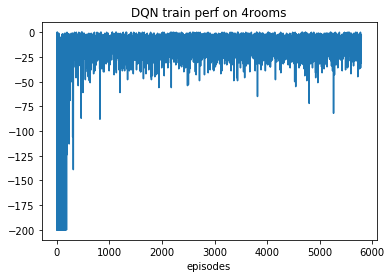

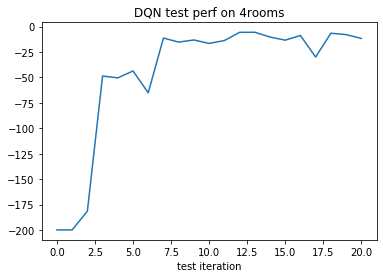

In [20]:
import matplotlib.pyplot as plt

plt.plot(returns_train)
plt.title('DQN train perf on 4rooms')
plt.xlabel('episodes')
plt.show()

plt.plot(returns_test)
plt.title('DQN test perf on 4rooms')
plt.xlabel('test iteration')
plt.show()

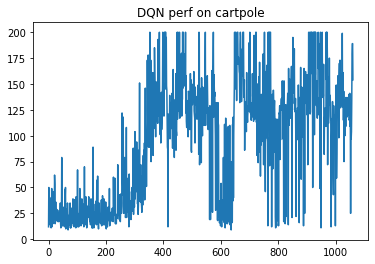

In [13]:
import matplotlib.pyplot as plt
plt.plot(returns)
plt.title('DQN perf on cartpole')
plt.show()

In [5]:
from gym import spaces

In [8]:
len(np.array([1,2,3]))

3